In [41]:
import warnings
warnings.simplefilter(action='ignore') #IGNORE ALL THE WARNINGS. I KNOW IT'S BAD BUT THERE ARE TOO MANY OF THEM

import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.animation as animation
import random
from geographiclib.geodesic import Geodesic
import time

In [76]:
#Simplifications, good functions

def get_position_of_node(graph, node):
    """
    Get latitude and longitude given node ID
    :param graph: object: OGraph object from osm_request
    :param node:      graphml node ID
    :return position: array:    [latitude, longitude]
    """
    # note that the x and y coordinates of the graph.nodes are flipped
    # this is possibly an issue with the omnx graph.load_graphml method
    # a correction is to make the position tuple be (y, x) as below
    position = np.array([graph.nodes[node]['x'], graph.nodes[node]['y']])
    return position

In [43]:
#Uploading coordinates. To change, modify config file

f = open('.\config\coordinates.txt')
boundtemp = []
for line in f:
    boundtemp.append(float(line[0:len(line)-1]))

boundaries = {"north": boundtemp[0], #Coordinates of Hong Kong Happy Valley
              "south": boundtemp[1],
              "east": boundtemp[2],
              "west": boundtemp[3] }
print (boundaries)

f.close()

{'north': 22.27049, 'south': 22.26206, 'east': 114.19605, 'west': 114.1792}


In [44]:
geod = Geodesic.WGS84
G = ox.graph_from_bbox(boundaries["north"], boundaries["south"], boundaries["east"], boundaries["west"], network_type='drive') 
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

projected_graph = ox.project_graph(G, to_crs="EPSG:3395")
Gc = ox.consolidate_intersections(projected_graph, dead_ends=True)
edges = ox.graph_to_gdfs(ox.get_undirected(Gc), nodes=False)

In [45]:
#Initiating database

vehnumber = 1
routes = []
route = []
allAngleList = []
direction = []
all_route_roadnames = []
all_route_speeds = []

angleList = []
direzione = []
route_roadnames = []
route_speed = []

LEFT_SIG = ""
STRAIGHT_SIG = ""
RIGHT_SIG = ""

columns = ['vehID', 'subroute', 'speed', 'turn', 'angle', 'lengthOfSubroute']
data = []
df = pd.DataFrame()

C:\Users\alist\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:7

<AxesSubplot:>

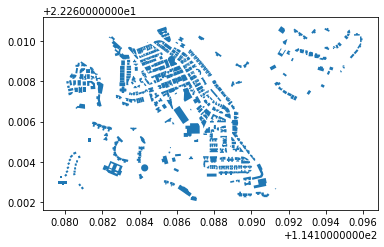

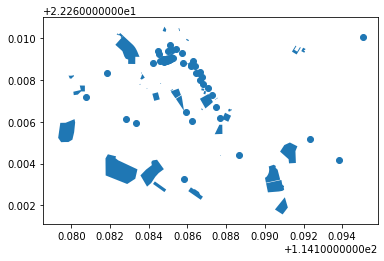

In [46]:
#Testing features
buildings = ox.geometries.geometries_from_bbox(boundaries["north"], boundaries["south"], boundaries["east"], boundaries["west"], tags = {'building': True})
buildings.plot()
commercial_area = ox.geometries.geometries_from_bbox(boundaries["north"], boundaries["south"], boundaries["east"], boundaries["west"], tags = {'amenity':True, 'landuse':['retail', 'commercial']})
commercial_area.plot()

1.755142 km distance


C:\Users\alist\anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


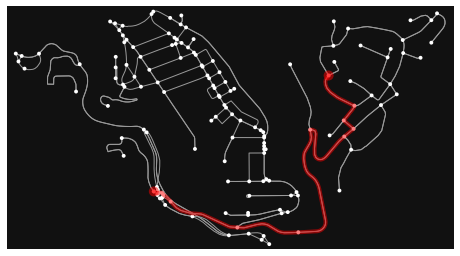

In [47]:
#Generating random coordinates for vehicles to travel


"""
The program uses Dijkstra algorithm for finding the shortest path
"""


lat = round(random.uniform(boundaries["north"], boundaries["south"]), 5)
lon = round(random.uniform(boundaries["east"], boundaries["west"]), 5)
good_orig_node = ox.get_nearest_node(G, (lat, lon), method='euclidean')

lat = round(random.uniform(boundaries["north"], boundaries["south"]), 5)
lon = round(random.uniform(boundaries["east"], boundaries["west"]), 5)
good_dest_node = ox.get_nearest_node(G, (lat, lon), method='euclidean')   
route = nx.shortest_path(G, good_orig_node, good_dest_node)
lengthOfRoute = nx.shortest_path_length(G, good_orig_node, good_dest_node, weight='length')

fig, ax = ox.plot_graph_route(G, route, orig_dest_size = 100, show=False, close=False)
real_length = lengthOfRoute/1000
print(str(real_length) + " km distance")

In [48]:

"""
Route analysis part
"""

route_coordinates = []

points = []
for node_id in route:
    x = projected_graph.nodes[node_id]['x']
    y = projected_graph.nodes[node_id]['y']
    points.append([x, y])
route_coordinates.append(points)
    
n_routes = len(route_coordinates)
max_route_len = max([len(x) for x in route_coordinates])

print(f'Number of nodes in the first route : {len(route_coordinates[0])}')
print(f'Coordinates of the first node in the first route : {route_coordinates[0][0]}')
print(f'Max number of nodes in a route : {max_route_len}')

Number of nodes in the first route : 14
Coordinates of the first node in the first route : [12710977.250255452, 2527070.6939492454]
Max number of nodes in a route : 14


(232221586, 5)  #first traffic light
[114.1842752  22.2661771]


C:\Users\alist\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


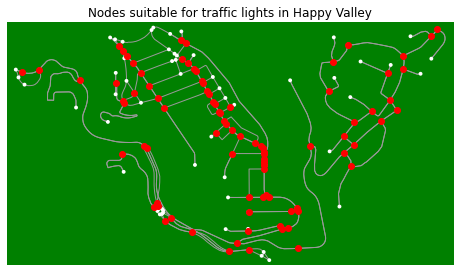

dfgdfgdfg [114.1794367  22.2688338]


In [118]:
##################
# Nodes with the degree of more than 3 have traffic lights
#
# Each number in the list below is a unique ID of the traffic light 
##################

traffic_lights = [] 
for i, node in enumerate(G.degree()): 
    if (node[1] > 3):
        traffic_lights.append(node)
print(traffic_lights[0], " #first traffic light") 

traffic_nodes_temp = []

for i in traffic_lights:
    traffic_nodes_temp.append(get_position_of_node(G, i[0]))

print (traffic_nodes_temp[0])

numtemp = 4

fig, ax = ox.plot_graph(G, show=False, close=False)
ax.set_facecolor('green')
for i in traffic_nodes_temp:  #FIND ALL SUITABLE FOR TRAFFIC LIGHTS
    ax.scatter(i[0], i[1], c='red')
#ax.scatter(traffic_nodes_temp[numtemp][0], traffic_nodes_temp[numtemp][1], c='red')
ax.set_title("Nodes suitable for traffic lights in Happy Valley")
plt.show()
#print(traffic_lights[numtemp])


#fig.savefig('foo.png')
print("dfgdfgdfg", get_position_of_node(G, 232221524))

In [141]:
for irou in route:
    incident_edges = edges[(edges['u_original']==irou) | (edges['v_original']==irou)] #df of the edges only on the route =====> (?) converting nodes to edges ==== iterates through edges
    #print(incident_edges["name"])
    for _, edge in incident_edges.fillna('').iterrows():
        #print("nodeID: ", irou, " Road name: ", edge['name'], ", ", "Speed limit (?): ", edge['speed_kph'], " kmph")
        instantroad = edge['name']
        instantspd = edge['speed_kph']
        route_roadnames.append(edge['name'])
        route_speed.append(edge['speed_kph'])

        latlat = G.nodes[irou]['y']
        lonlon = G.nodes[irou]['x']
    

In [137]:
print(G.nodes[232221524])

{'y': 22.2688338, 'x': 114.1794367, 'street_count': 3}


C:\Users\alist\anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\alist\anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

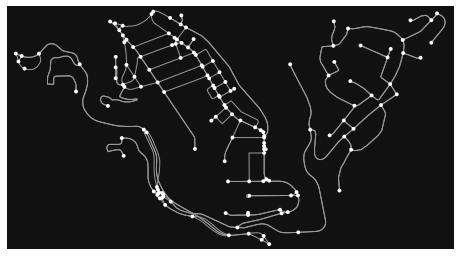

In [143]:
ox.plot_graph(ox.graph_from_bbox(boundaries["north"], boundaries["south"], boundaries["east"], boundaries["west"], network_type='drive'), show=False, close=False)

In [149]:
for i in G.nodes():
    print("Node ID: ", i, G.nodes()[i])

Node ID:  232221524 {'y': 22.2688338, 'x': 114.1794367, 'street_count': 3}
Node ID:  232221586 {'y': 22.2661771, 'x': 114.1842752, 'street_count': 3}
Node ID:  232221594 {'y': 22.2660794, 'x': 114.1843803, 'street_count': 3}
Node ID:  239989632 {'y': 22.2624801, 'x': 114.1874865, 'street_count': 3}
Node ID:  239989634 {'y': 22.2625374, 'x': 114.1882347, 'street_count': 3}
Node ID:  239989636 {'y': 22.2621716, 'x': 114.1890124, 'street_count': 3}
Node ID:  292204736 {'y': 22.2703004, 'x': 114.1846313, 'street_count': 3}
Node ID:  292204793 {'y': 22.2698073, 'x': 114.1834735, 'street_count': 3}
Node ID:  295888215 {'y': 22.2661726, 'x': 114.190559, 'street_count': 3}
Node ID:  297165917 {'y': 22.2692061, 'x': 114.1856978, 'street_count': 3}
Node ID:  297165938 {'y': 22.2697486, 'x': 114.1858675, 'street_count': 3}
Node ID:  312459683 {'y': 22.2639422, 'x': 114.1848131, 'street_count': 3}
Node ID:  312459832 {'y': 22.2639673, 'x': 114.1848483, 'street_count': 3}
Node ID:  312459835 {'y': 